In this analysis we are trying to predict whether a transaction is fradulent or not using 

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [81]:
df = pd.read_csv('creditcard.csv')

In [82]:
# display part of data set
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Statistics Insights & Visualization

In [83]:
# Columns and data type - null values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [84]:
# Mean median mode
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


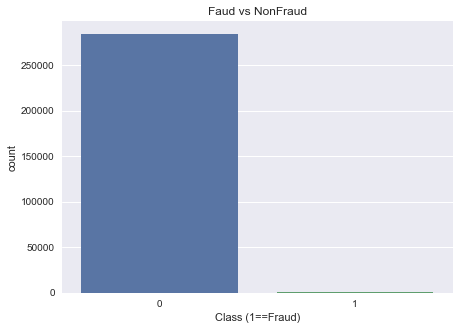

In [85]:
# We check the distribution of our class and examine if any imbalanced data (visualization is a better choice)
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='Class', data=df)
_ = plt.title('Faud vs NonFraud')
_ = plt.xlabel('Class (1==Fraud)')

In [86]:
df['Class'].value_counts() / len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We can clearly see that a high percentage of the data represents non fraudulent transactions. This is the type of data that we called imbalanced data. 99.8% belongs to non-fradulent transactions. If we make any model it would easily predict no-fraud with high accuracy, it would be quite useless. 

In [87]:
base_line_accuracy = 1-np.sum(df.Class)/df.shape[0]
base_line_accuracy

0.9982725143693799

In such data accuracy is not very useful. AUC (Area Under the Curver) is a better metrics to assess the model quality. 

In [88]:
# Separate dastaset 
X = df.drop('Class', axis=1)
y = df.Class.values

<AxesSubplot:>

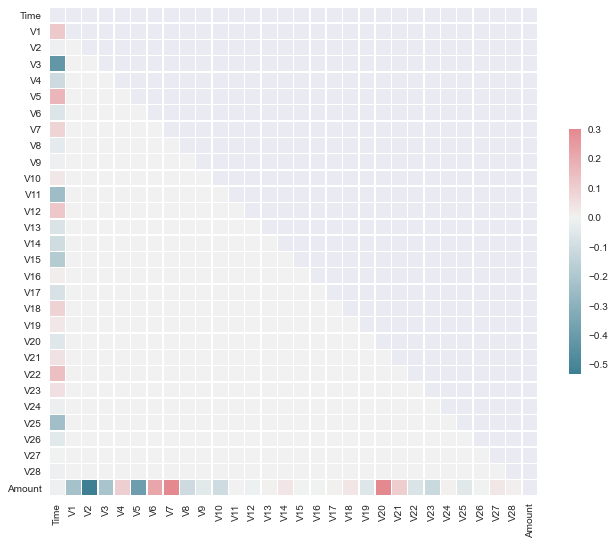

In [108]:
# Draw a heatmap to check for multicolinarity and correct aspect ratio
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Train the model

In [93]:
np.random.seed(43)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
# Standarize our data set
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

In [95]:
# Fit the model to the training set
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

### Train & Test score

In [96]:
# Get the training score and test scor
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

Confusion matrix:
 [[213213     27]
 [   128    237]]
Training accuracy: 99.9274 %
Training AUC: 97.6834 %


model is able to detect 68 fraudulent transactions out of 113 (recall of 60%) and produce 12 false alarms (<0.02%) on the test data.

In [97]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[71064    11]
 [   53    74]]
Training accuracy: 99.9101 %
Training AUC: 98.0858 %


In [98]:
# get precision recall for each class
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.999255  0.999845  0.999550     71075
           1   0.870588  0.582677  0.698113       127

    accuracy                       0.999101     71202
   macro avg   0.934921  0.791261  0.848832     71202
weighted avg   0.999025  0.999101  0.999012     71202



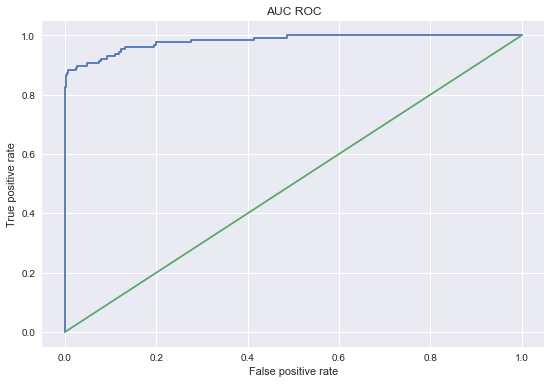

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

plt.savefig('auc_roc.png', dpi=600)

In [101]:
y_hat_90 = (y_test_hat_probs > 0.90 )*1
print('Confusion matrix:\n', confusion_matrix(y_test, y_hat_90))
print(classification_report(y_test, y_hat_90, digits=6))

Confusion matrix:
 [[71065    10]
 [   68    59]]
              precision    recall  f1-score   support

           0   0.999044  0.999859  0.999452     71075
           1   0.855072  0.464567  0.602041       127

    accuracy                       0.998905     71202
   macro avg   0.927058  0.732213  0.800746     71202
weighted avg   0.998787  0.998905  0.998743     71202



If we set the threshold to 90% the recall decrease from 60% to 45%. while the false positve rate is the same. We can see that our model assign some non-fraudulent a very high probability to be fraud

In [102]:
y_hat_10 = (y_test_hat_probs > 0.10)*1
print('Confusion matrix:\n', confusion_matrix(y_test, y_hat_10))
print(classification_report(y_test, y_hat_10, digits=4))

Confusion matrix:
 [[71047    28]
 [   31    96]]
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     71075
           1     0.7742    0.7559    0.7649       127

    accuracy                         0.9992     71202
   macro avg     0.8869    0.8778    0.8823     71202
weighted avg     0.9992    0.9992    0.9992     71202



If we set the threshold down to 10%, we can detect around 75% of all fraud case but almost double our false positive rate (now 25 false alarms)

- feature selection / engineering (which is a bit hard without any background information about the features),
- we could try techniques to counter the data inbalance and
- we could use cross-validation to fine tune the hyperparameters (regulaziation constant C) or
- try a different regulization (Lasso/Elastic Net) or
- optimizer (stochastic gradient desent instead of coordinate descnet)
- adjust class weights to move the decision boundary (make missed frauds more expansive in the loss function)
- and finally we could try different classifer models in sklearn like decision trees, random forrests, knn, naive - bayes or support vector machines.